In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\gamma3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

#Excel dosyasım oku

df = pd.read_excel('indoor_data_HAACS_col.xlsx')
df.head()

,col1,col2,col3,F_dB_min,F_dB_max,F_dB_mean,F_dB_std,F_dB_MAC_ID_min,F_dB_MAC_ID_max,F_dB_CH_min,...,dB_96,MAC_ID_97,CH_97,dB_97,MAC_ID_98,CH_98,dB_98,MAC_ID_99,CH_99,dB_99
0,0.0,0.0,0,-40,-82,-69.157895,12.024342,7,11,1,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0,-40,-82,-69.157895,12.024342,7,11,1,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0,-40,-82,-69.157895,12.024342,7,11,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0,-40,-82,-69.157895,12.024342,7,11,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0,-40,-82,-71.100000,9.164577,7,11,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.isnull().sum()

col1          0
col2          0
col3          0
 F_dB_min     0
 F_dB_max     0
             ..
 CH_98        0
 dB_98        0
 MAC_ID_99    0
 CH_99        0
 dB_99        0
Length: 315, dtype: int64

In [4]:
# Eksik değerleri belirli bir değerle doldurma
# Eksik değerleri belirli bir değerle doldurma
import numpy as np
df.fillna(np.nan)  # veya data.fillna(None)

,col1,col2,col3,F_dB_min,F_dB_max,F_dB_mean,F_dB_std,F_dB_MAC_ID_min,F_dB_MAC_ID_max,F_dB_CH_min,...,dB_96,MAC_ID_97,CH_97,dB_97,MAC_ID_98,CH_98,dB_98,MAC_ID_99,CH_99,dB_99
0,0.0,0.0,0,-40,-82,-69.157895,12.024342,7,11,1,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0,-40,-82,-69.157895,12.024342,7,11,1,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0,-40,-82,-69.157895,12.024342,7,11,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0,-40,-82,-69.157895,12.024342,7,11,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0,-40,-82,-71.100000,9.164577,7,11,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,12.0,31.2,3,-56,-88,-74.470588,9.572863,80,14,11,...,0,0,0,0,0,0,0,0,0,0
1981,12.0,31.2,3,-56,-88,-74.470588,9.572863,80,14,11,...,0,0,0,0,0,0,0,0,0,0
1982,12.0,31.2,3,-71,-88,-78.705882,5.687318,66,14,1,...,0,0,0,0,0,0,0,0,0,0
1983,12.0,31.2,3,-71,-88,-78.705882,5.687318,66,14,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Aykırı değerlerin tespiti
from scipy import stats
# Aykırı değerleri belirlemek için kullanılacak threshold değeri

z_scores = stats.zscore(df)
threshold = 3
aykiri_indeksler = np.where(np.abs(z_scores) > threshold)
aykiri_indeksler = np.where(np.abs(z_scores) > threshold)[0]

df.iloc[aykiri_indeksler, :] = np.nan
df.drop(aykiri_indeksler, axis=0, inplace=True)

In [6]:
# One-Hot Encoding
encoded_data = pd.get_dummies(df)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
df.head()

,col1,col2,col3,F_dB_min,F_dB_max,F_dB_mean,F_dB_std,F_dB_MAC_ID_min,F_dB_MAC_ID_max,F_dB_CH_min,...,dB_96,MAC_ID_97,CH_97,dB_97,MAC_ID_98,CH_98,dB_98,MAC_ID_99,CH_99,dB_99
35,2.4,-6.0,0.0,-52.0,-88.0,-70.7,11.074390,0.0,29.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,2.4,-6.0,0.0,-52.0,-88.0,-70.7,11.074390,0.0,29.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,2.4,-6.0,0.0,-52.0,-88.0,-70.7,11.074390,0.0,29.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,-4.8,-2.4,0.0,-56.0,-84.0,-74.1,8.837123,3.0,12.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,-4.8,-2.4,0.0,-56.0,-84.0,-74.1,8.837123,3.0,12.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


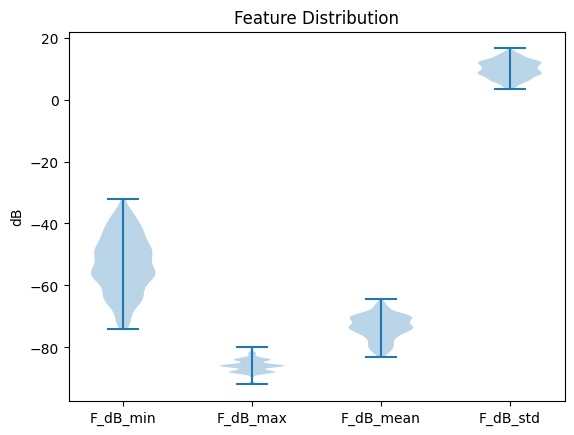

In [9]:
import matplotlib.pyplot as plt

data_to_plot = [df[' F_dB_min'], df[' F_dB_max'], df[' F_dB_mean'], df[' F_dB_std']]

plt.violinplot(data_to_plot)
plt.xticks([1, 2, 3, 4], ['F_dB_min', 'F_dB_max', 'F_dB_mean', 'F_dB_std'])
plt.ylabel('dB')
plt.title('Feature Distribution')
plt.show()

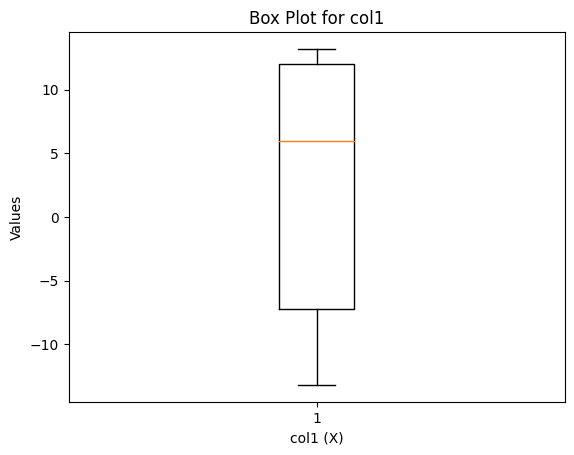

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(df['col1'])
plt.xlabel('col1 (X)')
plt.ylabel('Values')
plt.title('Box Plot for col1')
plt.show()

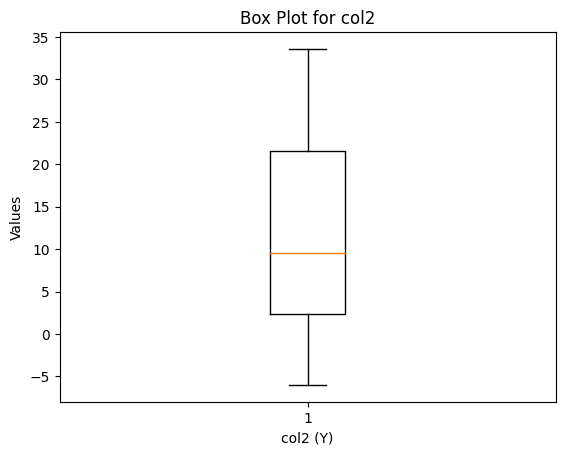

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(df['col2'])
plt.xlabel('col2 (Y)')
plt.ylabel('Values')
plt.title('Box Plot for col2')
plt.show()

In [12]:
df.to_csv('data.csv', index=False)

In [13]:
import pandas as pd

#CSV dosyusin oku

df = pd.read_csv('data.csv')

In [14]:
#Her sütunun unique değerleri ve saytlarin denatamps Tein bir dört austur

unique_values = {}

#Her bir sütunu kontrol er

for column in df.columns:

	#Sütunun unique değerleri ve sayılarım al

	unique = df[column].unique()

	unique_count = df[column].nunique()

	#Sözlüğe sütun adı ve unique degerleri ekle 
	unique_values[column] = {'unique_degerler': unique, 'unique_sayi': unique_count}


#Sonuçları yazdır  
for column, values in unique_values.items():
    print(f"{column}: {values['unique_sayi']} unique deger")
    print(f"Degerler: {values['unique_degerler']}")
    print()


col1: 23 unique deger
Degerler: [  2.4  -4.8  -8.4  -7.2  -3.6  -1.2   6.    7.2   8.4   4.8  -2.4   0.
   1.2 -10.8 -12.   -6.    3.6   9.6  10.8  12.   13.2  -9.6 -13.2]

col2: 34 unique deger
Degerler: [-6.  -2.4  3.6  4.8  7.2 30.  27.6 -3.6 -4.8 -1.2  1.2  2.4  8.4 12.
 13.2 14.4 15.6 16.8 18.  19.2 20.4 21.6 22.8 24.  25.2 26.4 32.4 33.6
 31.2 28.8 10.8  9.6  6.   0. ]

col3: 4 unique deger
Degerler: [0. 1. 2. 3.]

 F_dB_min: 31 unique deger
Degerler: [-52. -56. -48. -70. -58. -60. -50. -54. -46. -36. -66. -63. -65. -71.
 -40. -44. -32. -55. -57. -67. -64. -72. -42. -38. -74. -61. -68. -69.
 -62. -45. -47.]

 F_dB_max: 7 unique deger
Degerler: [-88. -84. -86. -92. -82. -80. -90.]

 F_dB_mean: 222 unique deger
Degerler: [-70.7        -74.1        -71.89473684 -76.94736842 -78.44444444
 -78.         -78.77777778 -79.78947368 -76.         -79.46666667
 -80.42857143 -77.63636364 -76.14285714 -72.         -70.35294118
 -70.31578947 -74.76190476 -73.26315789 -70.44444444 -70.33333333
 

In [15]:
df.head()

,col1,col2,col3,F_dB_min,F_dB_max,F_dB_mean,F_dB_std,F_dB_MAC_ID_min,F_dB_MAC_ID_max,F_dB_CH_min,...,dB_96,MAC_ID_97,CH_97,dB_97,MAC_ID_98,CH_98,dB_98,MAC_ID_99,CH_99,dB_99
0,2.4,-6.0,0.0,-52.0,-88.0,-70.7,11.074390,0.0,29.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.4,-6.0,0.0,-52.0,-88.0,-70.7,11.074390,0.0,29.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.4,-6.0,0.0,-52.0,-88.0,-70.7,11.074390,0.0,29.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-4.8,-2.4,0.0,-56.0,-84.0,-74.1,8.837123,3.0,12.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-4.8,-2.4,0.0,-56.0,-84.0,-74.1,8.837123,3.0,12.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
new_df1 = df.drop(columns=['col2','col3'])
new_df1.to_csv('new_df1.csv', index=False)

In [17]:
new_df2 = df.drop(columns=['col1','col3'])
new_df2.to_csv('new_df2.csv', index=False)

In [18]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\gamma3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

#Veri Setini oku 
df = pd.read_csv('new_df1.csv') 

In [20]:
pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\gamma3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
# ============================================== COL1 (X) icin REGRESSION =====================================================

In [22]:
pip install tabulate


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\gamma3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Linear Regression - RMSE: 1.485130134401164
Linear Regression - R-squared (Test): 0.971596384825767
Linear Regression - R-squared (Train): 0.9870133939748409
Decision Tree Regression - RMSE: 1.1797530793738995
Decision Tree Regression - R-squared (Test): 0.9820763341608645
Decision Tree Regression - R-squared (Train): 0.9907538595921291
Random Forest Regression - RMSE: 0.6529620315409967
Random Forest Regression - R-squared (Test): 0.9945093917715131
Random Forest Regression - R-squared (Train): 0.9990082980599104
Gradient Boosting Regression - RMSE: 0.5680041919599286
Gradient Boosting Regression - R-squared (Test): 0.9958452233607523
Gradient Boosting Regression - R-squared (Train): 0.9987190050458848
Support Vector Regression - RMSE: 2.021357056234845
Support Vector Regression - R-squared (Test): 0.9473824443507013
Support Vector Regression - R-squared (Train): 0.968570647507209
K-Nearest Neighbors Regression - RMSE: 1.972335498101976
K-Nearest Neighbors Regression - R-squared (Test

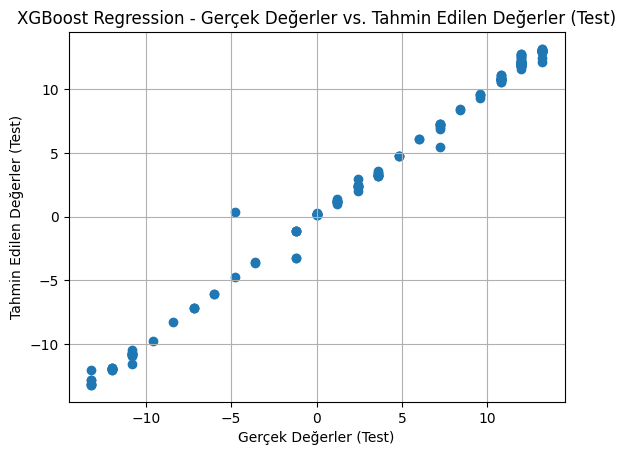

Execution time: 1.7547457218170166 seconds
+----+--------------------------------+--------------------+---------------------+
|    | Model                          |   R-squared (Test) |   R-squared (Train) |
|----+--------------------------------+--------------------+---------------------|
|  0 | XGBoost Regression             |           0.99622  |            0.999869 |
|  1 | Gradient Boosting Regression   |           0.995845 |            0.998719 |
|  2 | Random Forest Regression       |           0.994509 |            0.999008 |
|  3 | Decision Tree Regression       |           0.982076 |            0.990754 |
|  4 | Linear Regression              |           0.971596 |            0.987013 |
|  5 | K-Nearest Neighbors Regression |           0.949904 |            0.987971 |
|  6 | Support Vector Regression      |           0.947382 |            0.968571 |
+----+--------------------------------+--------------------+---------------------+


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import time

# Start the timer
start_time = time.time()

# CSV dosyasını oku
df = pd.read_csv('new_df1.csv')

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df.drop(columns=['col1'])
y = df['col1']

# Veri kümesini eğitim, doğrulama ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Doğrusal Regresyon (Linear Regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2_test = r2_score(y_test, linear_y_pred)
linear_r2_train = r2_score(y_train, linear_model.predict(X_train))
print("Linear Regression - RMSE:", linear_rmse)
print("Linear Regression - R-squared (Test):", linear_r2_test)
print("Linear Regression - R-squared (Train):", linear_r2_train)

# Karar Ağacı Regresyonu (Decision Tree Regression)
dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2_test = r2_score(y_test, dt_y_pred)
dt_r2_train = r2_score(y_train, dt_model.predict(X_train))
print("Decision Tree Regression - RMSE:", dt_rmse)
print("Decision Tree Regression - R-squared (Test):", dt_r2_test)
print("Decision Tree Regression - R-squared (Train):", dt_r2_train)

# Rastgele Orman Regresyonu (Random Forest Regression)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2_test = r2_score(y_test, rf_y_pred)
rf_r2_train = r2_score(y_train, rf_model.predict(X_train))
print("Random Forest Regression - RMSE:", rf_rmse)
print("Random Forest Regression - R-squared (Test):", rf_r2_test)
print("Random Forest Regression - R-squared (Train):", rf_r2_train)

# Gradient Boosting Regresyonu
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2_test = r2_score(y_test, gb_y_pred)
gb_r2_train = r2_score(y_train, gb_model.predict(X_train))
print("Gradient Boosting Regression - RMSE:", gb_rmse)
print("Gradient Boosting Regression - R-squared (Test):", gb_r2_test)
print("Gradient Boosting Regression - R-squared (Train):", gb_r2_train)

# Destek Vektör Regresyonu (Support Vector Regression)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2_test = r2_score(y_test, svr_y_pred)
svr_r2_train = r2_score(y_train, svr_model.predict(X_train))
print("Support Vector Regression - RMSE:", svr_rmse)
print("Support Vector Regression - R-squared (Test):", svr_r2_test)
print("Support Vector Regression - R-squared (Train):", svr_r2_train)

# K-En Yakın Komşu Regresyonu (K-Nearest Neighbors Regression)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2_test = r2_score(y_test, knn_y_pred)
knn_r2_train = r2_score(y_train, knn_model.predict(X_train))
print("K-Nearest Neighbors Regression - RMSE:", knn_rmse)
print("K-Nearest Neighbors Regression - R-squared (Test):", knn_r2_test)
print("K-Nearest Neighbors Regression - R-squared (Train):", knn_r2_train)

# XGBoost Regresyonu
xgb_model = xgb.XGBRegressor(reg_alpha=1, reg_lambda=1, gamma=0.1)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2_test = r2_score(y_test, xgb_y_pred)
xgb_r2_train = r2_score(y_train, xgb_model.predict(X_train))
print("XGBoost Regression - RMSE:", xgb_rmse)
print("XGBoost Regression - R-squared (Test):", xgb_r2_test)
print("XGBoost Regression - R-squared (Train):", xgb_r2_train)

# R-squared değerlerine göre sıralama
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Support Vector Regression', 'K-Nearest Neighbors Regression', 'XGBoost Regression']
r2_values_test = [linear_r2_test, dt_r2_test, rf_r2_test, gb_r2_test, svr_r2_test, knn_r2_test, xgb_r2_test]
r2_values_train = [linear_r2_train, dt_r2_train, rf_r2_train, gb_r2_train, svr_r2_train, knn_r2_train, xgb_r2_train]
sorted_indices_test = np.argsort(r2_values_test)[::-1]
sorted_indices_train = np.argsort(r2_values_train)[::-1]
sorted_models_test = [models[i] for i in sorted_indices_test]
sorted_models_train = [models[i] for i in sorted_indices_train]
sorted_r2_test = [r2_values_test[i] for i in sorted_indices_test]
sorted_r2_train = [r2_values_train[i] for i in sorted_indices_train]

print("\nSıralama (R-squared değerlerine göre):")
for i, (model_test, model_train, r2_test, r2_train) in enumerate(zip(sorted_models_test, sorted_models_train, sorted_r2_test, sorted_r2_train)):
    print(f"{i+1}. {model_test} - R-squared (Test): {r2_test}")

# En iyi modelin R-squared değerini bulma
best_model_test = sorted_models_test[0]
r2_x_regression_test = sorted_r2_test[0]
print("En iyi modelin R-squared değeri (Test):", r2_x_regression_test)

# En iyi modelin scatter plot çizdirme
if best_model_test == 'Linear Regression':
    y_pred_test = linear_y_pred
elif best_model_test == 'Decision Tree Regression':
    y_pred_test = dt_y_pred
elif best_model_test == 'Random Forest Regression':
    y_pred_test = rf_y_pred
elif best_model_test == 'Gradient Boosting Regression':
    y_pred_test = gb_y_pred
elif best_model_test == 'Support Vector Regression':
    y_pred_test = svr_y_pred
elif best_model_test == 'K-Nearest Neighbors Regression':
    y_pred_test = knn_y_pred
elif best_model_test == 'XGBoost Regression':
    y_pred_test = xgb_y_pred

# Scatter plot çizdirme (Test)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Gerçek Değerler (Test)')
plt.ylabel('Tahmin Edilen Değerler (Test)')
plt.title(f'{best_model_test} - Gerçek Değerler vs. Tahmin Edilen Değerler (Test)')
plt.grid(True)
plt.show()

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

import pandas as pd
from tabulate import tabulate

# Create a DataFrame for the R-squared values
results_df = pd.DataFrame({
    'Model': models,
    'R-squared (Test)': r2_values_test,
    'R-squared (Train)': r2_values_train
})

# Sort the DataFrame by R-squared values in descending order
results_df = results_df.sort_values(by='R-squared (Test)', ascending=False)

# Reset the index of the DataFrame
results_df = results_df.reset_index(drop=True)

# Print the table
print(tabulate(results_df, headers='keys', tablefmt='psql'))


In [24]:
# ============================================== COL2 (Y) icin REGRESSION =====================================================

Linear Regression - Train R-squared: 0.9726721397756198
Linear Regression - Test R-squared: 0.9638532357167012
Decision Tree Regression - Train R-squared: 0.9470189693458951
Decision Tree Regression - Test R-squared: 0.9531685485783883
Random Forest Regression - Train R-squared: 0.998828072182918
Random Forest Regression - Test R-squared: 0.9946464986482062
Gradient Boosting Regression - RMSE: 1.0043414219088582
Gradient Boosting Regression - R-squared (Test): 0.9926125572555557
Gradient Boosting Regression - R-squared (Train): 0.9956446793952384
Support Vector Regression - RMSE: 4.715680201742787
Support Vector Regression - R-squared (Test): 0.8371378853847551
Support Vector Regression - R-squared (Train): 0.8483901554234585
K-Nearest Neighbors Regression - RMSE: 2.2964999880518073
K-Nearest Neighbors Regression - R-squared (Test): 0.9613753751987499
K-Nearest Neighbors Regression - R-squared (Train): 0.9730520213567063
XGBoost Regression - RMSE: 0.749910719199956
XGBoost Regression -

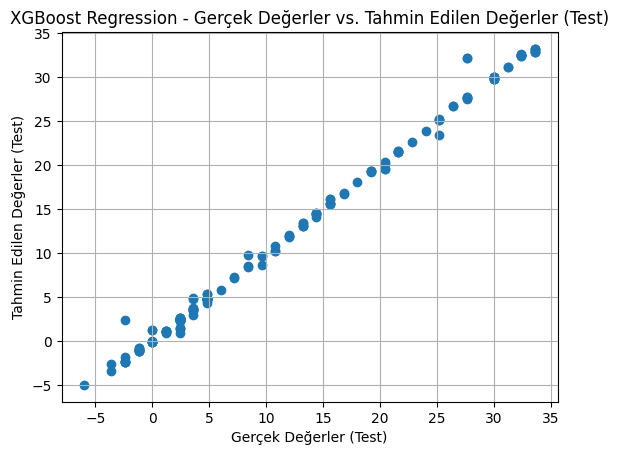

Execution time: 1.7586450576782227 seconds
+----+--------------------------------+--------------------+---------------------+
|    | Model                          |   R-squared (Test) |   R-squared (Train) |
|----+--------------------------------+--------------------+---------------------|
|  0 | XGBoost Regression             |           0.995881 |            0.999856 |
|  1 | Random Forest Regression       |           0.994509 |            0.999008 |
|  2 | Gradient Boosting Regression   |           0.992613 |            0.995645 |
|  3 | Decision Tree Regression       |           0.982076 |            0.990754 |
|  4 | Linear Regression              |           0.971596 |            0.987013 |
|  5 | K-Nearest Neighbors Regression |           0.961375 |            0.973052 |
|  6 | Support Vector Regression      |           0.837138 |            0.84839  |
+----+--------------------------------+--------------------+---------------------+


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import time

# Start the timer
start_time = time.time()

# CSV dosyasını okuma
df = pd.read_csv('new_df2.csv')

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df.drop(columns=["col2"])
y = df["col2"]

# Veri kümesini eğitim, doğrulama ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Doğrusal Regresyon (Linear Regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_train_y_pred = linear_model.predict(X_train)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_y_pred)
linear_train_r2 = r2_score(y_train, linear_train_y_pred)
print("Linear Regression - Train R-squared:", linear_train_r2)
print("Linear Regression - Test R-squared:", linear_r2)

# Karar Ağacı Regresyonu (Decision Tree Regression)
dt_model = DecisionTreeRegressor(max_depth=5)  # Adjust the max_depth value
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_train_y_pred = dt_model.predict(X_train)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_y_pred)
dt_train_r2 = r2_score(y_train, dt_train_y_pred)
print("Decision Tree Regression - Train R-squared:", dt_train_r2)
print("Decision Tree Regression - Test R-squared:", dt_r2)

# Rastgele Orman Regresyonu (Random Forest Regression)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_train_y_pred = rf_model.predict(X_train)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_train_r2 = r2_score(y_train, rf_train_y_pred)
print("Random Forest Regression - Train R-squared:", rf_train_r2)
print("Random Forest Regression - Test R-squared:", rf_r2)

# Gradient Boosting Regresyonu
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_train_y_pred = gb_model.predict(X_train)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2_test = r2_score(y_test, gb_y_pred)
gb_r2_train = r2_score(y_train, gb_model.predict(X_train))
print("Gradient Boosting Regression - RMSE:", gb_rmse)
print("Gradient Boosting Regression - R-squared (Test):", gb_r2_test)
print("Gradient Boosting Regression - R-squared (Train):", gb_r2_train)

# Destek Vektör Regresyonu (Support Vector Regression)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2_test = r2_score(y_test, svr_y_pred)
svr_r2_train = r2_score(y_train, svr_model.predict(X_train))
print("Support Vector Regression - RMSE:", svr_rmse)
print("Support Vector Regression - R-squared (Test):", svr_r2_test)
print("Support Vector Regression - R-squared (Train):", svr_r2_train)

# K-En Yakın Komşu Regresyonu (K-Nearest Neighbors Regression)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2_test = r2_score(y_test, knn_y_pred)
knn_r2_train = r2_score(y_train, knn_model.predict(X_train))
print("K-Nearest Neighbors Regression - RMSE:", knn_rmse)
print("K-Nearest Neighbors Regression - R-squared (Test):", knn_r2_test)
print("K-Nearest Neighbors Regression - R-squared (Train):", knn_r2_train)

# XGBoost Regresyonu
xgb_model = xgb.XGBRegressor(reg_alpha=1, reg_lambda=1, gamma=0.1)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2_test = r2_score(y_test, xgb_y_pred)
xgb_r2_train = r2_score(y_train, xgb_model.predict(X_train))
print("XGBoost Regression - RMSE:", xgb_rmse)
print("XGBoost Regression - R-squared (Test):", xgb_r2_test)
print("XGBoost Regression - R-squared (Train):", xgb_r2_train)

# R-squared değerlerine göre sıralama
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Support Vector Regression', 'K-Nearest Neighbors Regression', 'XGBoost Regression']
r2_values_test = [linear_r2_test, dt_r2_test, rf_r2_test, gb_r2_test, svr_r2_test, knn_r2_test, xgb_r2_test]
r2_values_train = [linear_r2_train, dt_r2_train, rf_r2_train, gb_r2_train, svr_r2_train, knn_r2_train, xgb_r2_train]
sorted_indices_test = np.argsort(r2_values_test)[::-1]
sorted_indices_train = np.argsort(r2_values_train)[::-1]
sorted_models_test = [models[i] for i in sorted_indices_test]
sorted_models_train = [models[i] for i in sorted_indices_train]
sorted_r2_test = [r2_values_test[i] for i in sorted_indices_test]
sorted_r2_train = [r2_values_train[i] for i in sorted_indices_train]

print("\nSıralama (R-squared değerlerine göre):")
for i, (model_test, model_train, r2_test, r2_train) in enumerate(zip(sorted_models_test, sorted_models_train, sorted_r2_test, sorted_r2_train)):
    print(f"{i+1}. {model_test} - R-squared (Test): {r2_test}")

# En iyi modelin R-squared değerini bulma
best_model_test = sorted_models_test[0]
r2_y_regression_test = sorted_r2_test[0]
print("En iyi modelin R-squared değeri (Test):", r2_y_regression_test)

# En iyi modelin scatter plot çizdirme
if best_model_test == 'Linear Regression':
    y_pred_test = linear_y_pred
elif best_model_test == 'Decision Tree Regression':
    y_pred_test = dt_y_pred
elif best_model_test == 'Random Forest Regression':
    y_pred_test = rf_y_pred
elif best_model_test == 'Gradient Boosting Regression':
    y_pred_test = gb_y_pred
elif best_model_test == 'Support Vector Regression':
    y_pred_test = svr_y_pred
elif best_model_test == 'K-Nearest Neighbors Regression':
    y_pred_test = knn_y_pred
elif best_model_test == 'XGBoost Regression':
    y_pred_test = xgb_y_pred

# Scatter plot çizdirme (Test)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Gerçek Değerler (Test)')
plt.ylabel('Tahmin Edilen Değerler (Test)')
plt.title(f'{best_model_test} - Gerçek Değerler vs. Tahmin Edilen Değerler (Test)')
plt.grid(True)
plt.show()

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

import pandas as pd
from tabulate import tabulate

# Create a DataFrame for the R-squared values
results_df = pd.DataFrame({
    'Model': models,
    'R-squared (Test)': r2_values_test,
    'R-squared (Train)': r2_values_train
})

# Sort the DataFrame by R-squared values in descending order
results_df = results_df.sort_values(by='R-squared (Test)', ascending=False)

# Reset the index of the DataFrame
results_df = results_df.reset_index(drop=True)

# Print the table
print(tabulate(results_df, headers='keys', tablefmt='psql'))

In [26]:
# ==================================================CLASSIFICATION======================================================

Decision Trees - Validation doğruluk oranı: 0.9904761904761905
Decision Trees - Validation F1 skoru: 0.990340224344118

K-Nearest Neighbors (KNN) - Validation doğruluk oranı: 0.8761904761904762
K-Nearest Neighbors (KNN) - Validation F1 skoru: 0.8781006607564874

Logistic Regression - Validation doğruluk oranı: 0.9809523809523809
Logistic Regression - Validation F1 skoru: 0.980916281785847

Naïve Bayes - Validation doğruluk oranı: 0.4380952380952381
Naïve Bayes - Validation F1 skoru: 0.39756802721088436

Decision Trees - Test doğruluk oranı: 0.975609756097561
Decision Trees - Test F1 skoru: 0.9755288114410414

K-Nearest Neighbors (KNN) - Test doğruluk oranı: 0.9186991869918699
K-Nearest Neighbors (KNN) - Test F1 skoru: 0.9185192499698276

Logistic Regression - Test doğruluk oranı: 0.975609756097561
Logistic Regression - Test F1 skoru: 0.9755091568374752

Naïve Bayes - Test doğruluk oranı: 0.4959349593495935
Naïve Bayes - Test F1 skoru: 0.4667832103019451

En iyi test doğruluk oranı: 0.9

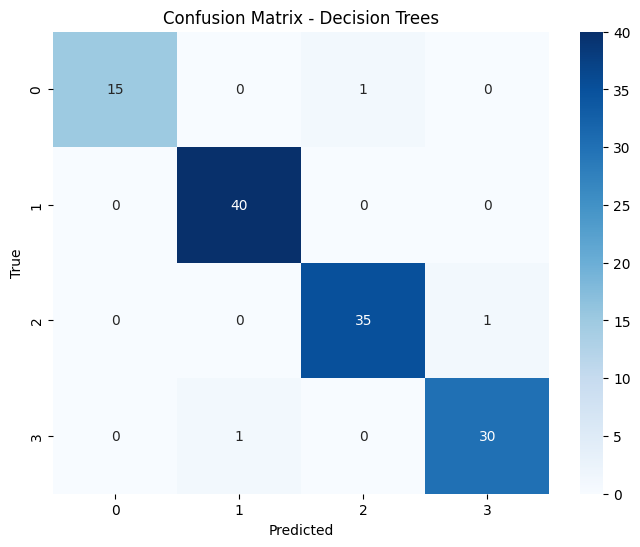

Execution time: 0.5203878879547119 seconds


In [27]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Start the timer
start_time = time.time()

# Your code here

# Veri setini okuma
data = pd.read_csv('data.csv')

# Bağımsız değişkenler
X = data.drop(columns=['col3'])
# Bağımlı değişken
y = data['col3']

# Veri setini train ve test kısımlarına ayırma
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Kalan veri setini train ve validation kısımlarına ayırma
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# Veri önişleme adımları
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Hierarchical Classification
hierarchical_model = AgglomerativeClustering(n_clusters=2)  # İki sınıf olduğunu varsayalım
hierarchical_model.fit(X_train_scaled)

# Modeli validation veri seti üzerinde değerlendirme
y_val_pred_dt = dt_model.predict(X_val_scaled)
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
f1_dt = f1_score(y_val, y_val_pred_dt, average='weighted')
print("Decision Trees - Validation doğruluk oranı:", accuracy_dt)
print("Decision Trees - Validation F1 skoru:", f1_dt)
print()

y_val_pred_knn = knn_model.predict(X_val_scaled)
accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
f1_knn = f1_score(y_val, y_val_pred_knn, average='weighted')
print("K-Nearest Neighbors (KNN) - Validation doğruluk oranı:", accuracy_knn)
print("K-Nearest Neighbors (KNN) - Validation F1 skoru:", f1_knn)
print()

y_val_pred_lr = lr_model.predict(X_val_scaled)
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
f1_lr = f1_score(y_val, y_val_pred_lr, average='weighted')
print("Logistic Regression - Validation doğruluk oranı:", accuracy_lr)
print("Logistic Regression - Validation F1 skoru:", f1_lr)
print()

y_val_pred_nb = nb_model.predict(X_val_scaled)
accuracy_nb = accuracy_score(y_val, y_val_pred_nb)
f1_nb = f1_score(y_val, y_val_pred_nb, average='weighted')
print("Naïve Bayes - Validation doğruluk oranı:", accuracy_nb)
print("Naïve Bayes - Validation F1 skoru:", f1_nb)
print()

# Modeli test veri seti üzerinde değerlendirme
y_test_pred_dt = dt_model.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_test_pred_dt)
f1_dt_test = f1_score(y_test, y_test_pred_dt, average='weighted')
print("Decision Trees - Test doğruluk oranı:", accuracy_dt_test)
print("Decision Trees - Test F1 skoru:", f1_dt_test)
print()

y_test_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_test_pred_knn)
f1_knn_test = f1_score(y_test, y_test_pred_knn, average='weighted')
print("K-Nearest Neighbors (KNN) - Test doğruluk oranı:", accuracy_knn_test)
print("K-Nearest Neighbors (KNN) - Test F1 skoru:", f1_knn_test)
print()

y_test_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_test_pred_lr)
f1_lr_test = f1_score(y_test, y_test_pred_lr, average='weighted')
print("Logistic Regression - Test doğruluk oranı:", accuracy_lr_test)
print("Logistic Regression - Test F1 skoru:", f1_lr_test)
print()

y_test_pred_nb = nb_model.predict(X_test_scaled)
accuracy_nb_test = accuracy_score(y_test, y_test_pred_nb)
f1_nb_test = f1_score(y_test, y_test_pred_nb, average='weighted')
print("Naïve Bayes - Test doğruluk oranı:", accuracy_nb_test)
print("Naïve Bayes - Test F1 skoru:", f1_nb_test)
print()

# En iyi test doğruluk oranına sahip modelin doğruluk sonucunu atama
best_accuracy = max(accuracy_dt_test, accuracy_knn_test, accuracy_lr_test, accuracy_nb_test)
if best_accuracy == accuracy_dt_test:
    best_model = dt_model
    best_model_name = "Decision Trees"
elif best_accuracy == accuracy_knn_test:
    best_model = knn_model
    best_model_name = "K-Nearest Neighbors (KNN)"
elif best_accuracy == accuracy_lr_test:
    best_model = lr_model
    best_model_name = "Logistic Regression"
else:
    best_model = nb_model
    best_model_name = "Naïve Bayes"

accuracy_best = best_accuracy
print("En iyi test doğruluk oranı:", accuracy_best)
print()

# En iyi model için confusion matrix çizdirme
y_test_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_test_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - " + best_model_name)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

In [28]:
# Project performance score
project_performance_score = r2_x_regression_test * r2_y_regression_test * accuracy_best
print(project_performance_score)

0.9679191432376344
